Nama : Aisha Aryani <br>
Nim : 22.11.5118 <br>
Dosen Pengampu : I Made Artha Agastya, S.T., M. Eng., Ph.D


# Deteksi Diabetes Sejak Dini
Tujuan proyek deteksi diabetes adalah untuk meningkatkan pemahaman dan penggunaan teknologi dalam mendeteksi diabetes dengan lebih cepat dan akurat. Dengan menggunakan algoritma seperti Random Forest, SVM, atau Neural Networks, proyek ini bertujuan untuk menggantikan atau melengkapi diagnosis manual oleh tenaga medis. Teknologi ini diharapkan bisa lebih cepat dan akurat dalam mengenali pola yang menandakan adanya diabetes.

## Tahapan Proses Data Mining
1. **Preprocessing Data**: Meliputi pembersihan data, normalisasi, dan pembagian data.
2. **Eksplorasi Data**: Melihat distribusi data dan hubungan antar variabel.
3. **Pemodelan**: Menggunakan algoritma klasifikasi untuk memprediksi kemungkinan diabetes.
4. **Evaluasi Model**: Mengukur performa model menggunakan metrik evaluasi seperti akurasi.


In [18]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # Import matplotlib.pyplot
import seaborn as sns  # Import seaborn
# Install imblearn if you haven't already
!pip install imblearn
# Import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [42]:
# 1. Memuat Dataset
# Dataset yang digunakan:
data = pd.read_csv('/content/diabetes.csv')
columns = ["Kehamilan", "Glukosa", "TekananDarah", "KetebalanKulit", "Insulin", "BMI", "RiwayatKeluarga", "Usia", "Hasil"]

# Membaca dataset
data.columns = columns
for column in data.columns:
    try:
        data[column] = pd.to_numeric(data[column])
    except ValueError:
        print(f"Column '{column}' contains non-numeric values. Handling this column separately.")
data.head()

,Kehamilan,Glukosa,TekananDarah,KetebalanKulit,Insulin,BMI,RiwayatKeluarga,Usia,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# 2. Eksplorasi Data
print("Informasi Dataset:")
print(data.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kehamilan        768 non-null    int64  
 1   Glukosa          768 non-null    int64  
 2   TekananDarah     768 non-null    int64  
 3   KetebalanKulit   768 non-null    int64  
 4   Insulin          768 non-null    int64  
 5   BMI              768 non-null    float64
 6   RiwayatKeluarga  768 non-null    float64
 7   Usia             768 non-null    int64  
 8   Hasil            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik Deskriptif:
        Kehamilan     Glukosa  TekananDarah  KetebalanKulit     Insulin  \
count  768.000000  768.000000    768.000000      768.000000  768.000000   
mean     3.845052  120.894531     69.105469       20.536458   79.799479   
std      3.369578   31.972618     19.355807       15.952218  115.24

In [44]:
# Mengecek nilai kosong dan menggantinya dengan nilai rata-rata kolom
data.replace(0, np.nan, inplace=True)

# Convert columns to numeric, handling errors
for column in data.columns:
    try:
        data[column] = pd.to_numeric(data[column])
    except ValueError:
        print(f"Column '{column}' contains non-numeric values. Skipping imputation for this column.")

# Exclude the 'Hasil' column from the mean calculation
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())  # Impute only numeric columns

print("Jumlah nilai kosong setelah imputasi:")
print(data.isnull().sum())

Jumlah nilai kosong setelah imputasi:
Kehamilan          0
Glukosa            0
TekananDarah       0
KetebalanKulit     0
Insulin            0
BMI                0
RiwayatKeluarga    0
Usia               0
Hasil              0
dtype: int64


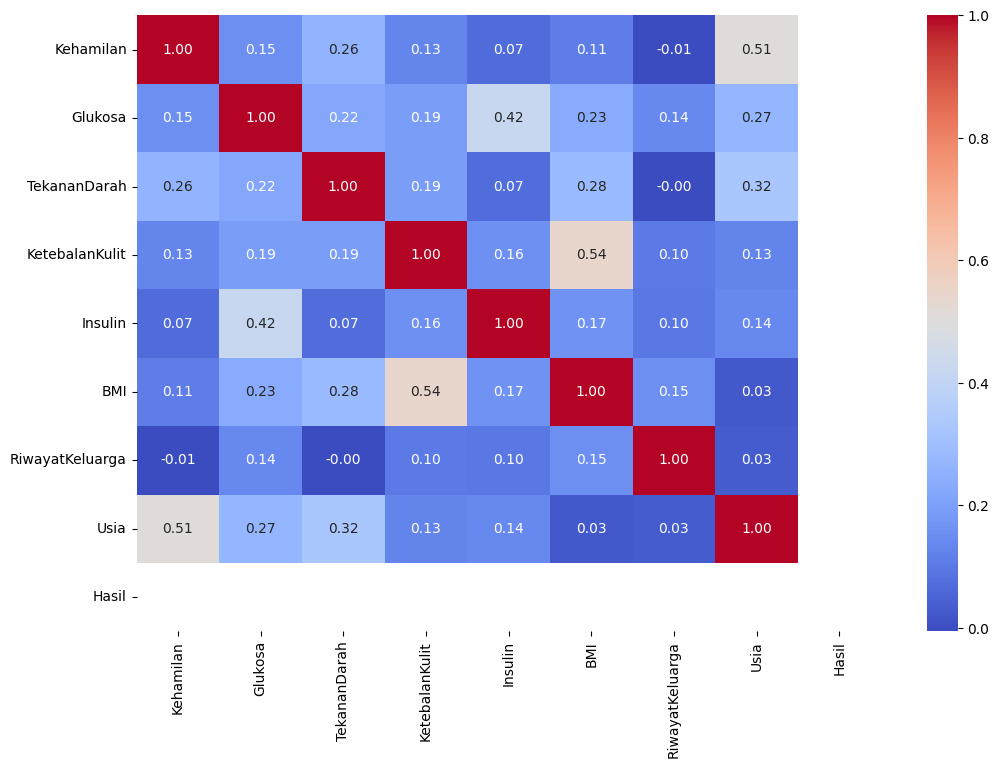

In [45]:
# Korelasi antar kolom numerik
corr = data.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))  # Now plt is defined
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')  # Now sns is defined
plt.show()

In [46]:
print("\nCek jumlah data :")
print(data['Hasil'].value_counts())


Cek jumlah data :
Hasil
1.0    768
Name: count, dtype: int64


In [47]:
# 3. Preprocessing Data
# Memisahkan
X = data.drop("Hasil", axis=1)
y = data["Hasil"]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data latih dan uji
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
# 4. Pemodelan Menggunakan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

In [49]:
# 5. Evaluasi Model
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model: 1.00

Confusion Matrix:
[[154]]

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       154

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


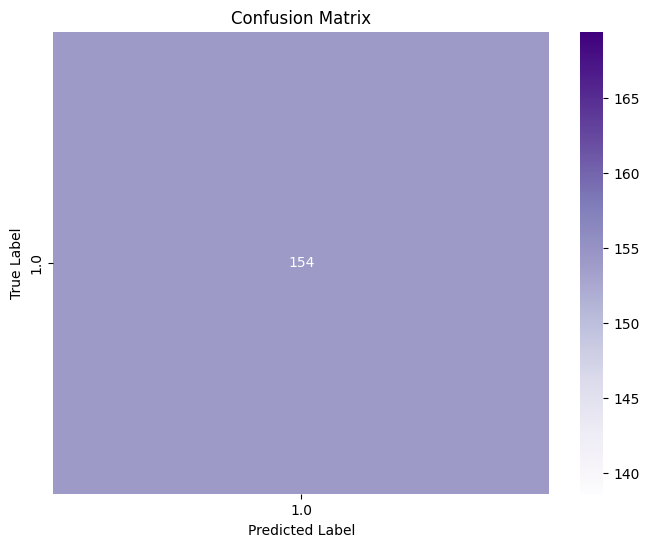

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
